# Introduction to machine learning with scikit-learn

By: Ana Matran-Fernandez

Based on the [scikit-learn documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

Now that we've learnt how to train a classifier, we are going to do this properly.

We first need to reload the dataset and the necessary libraries

# Loading the 'breast cancer' dataset and importing necessary libraries

In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

## Cross-validation

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

Let's try with a smaller subset of the `cancer` dataset.

In [4]:
clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=5)
accuracies = []
# For illustration purposes, let's see what this looks like
for train_indices, test_indices in k_fold.split(cancer.data[:40]): # consider the first 40 examples
    print('Train: %s | test: %s' % (train_indices, test_indices))
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    print('Fold test accuracy: {} %'.format(clf.score(cancer.data[test_indices], cancer.target[test_indices])*100))
    accuracies.append(clf.score(cancer.data[test_indices], cancer.target[test_indices])*100)
print("Accuracies across all test folds:", accuracies)

Train: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [0 1 2 3 4 5 6 7]
Fold test accuracy: 100.0 %
Train: [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [ 8  9 10 11 12 13 14 15]
Fold test accuracy: 87.5 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39] | test: [16 17 18 19 20 21 22 23]
Fold test accuracy: 62.5 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 32 33 34 35 36 37 38 39] | test: [24 25 26 27 28 29 30 31]
Fold test accuracy: 100.0 %
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] | test: [32 33 34 35 36 37 38 39]
Fold test accuracy: 87.5 %
Accuracies across all test folds: [100.0, 87.5, 62.5, 100.0, 87.5]


Let's now try with the whole dataset.

In [5]:
score = []
clf = svm.SVC(gamma=0.0001, C=100.)
k_fold = KFold(n_splits=10)
for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancer.data[test_indices], cancer.target[test_indices]))
print('Average accuracy: %.2f%%' % (np.mean(score)*100))

Average accuracy: 94.19%


As a shortcut, we can use `cross_val_score` for the same purposes.

In [6]:
score_2 = cross_val_score(clf, cancer.data, cancer.target, cv=k_fold, n_jobs=-1)
print('Average accuracy: %.2f%%' % (np.mean(score_2)*100))

Average accuracy: 94.19%


Now it's your turn: perform 10-fold cross-validation on the cancer dataset, and print the average cross-validation accuracy of a random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Insert code here
k_fold = KFold(n_splits=10)
score_2 = cross_val_score(clf, cancer.data, cancer.target, cv=k_fold, n_jobs=-1)
print('Average accuracy: %.2f%%' % (np.mean(score_2)*100))

Average accuracy: 97.71%


## Grid-search

Scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [26]:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(gamma=0.01, C=10.)
Cs = np.logspace(-1, 3, 9)
Gs = np.logspace(-7, -0, 8)
clf = GridSearchCV(estimator=clf, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1)

score = []
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(cancer.data):
    clf.fit(cancer.data[train_indices], cancer.target[train_indices])
    score.append(clf.score(cancer.data[test_indices], cancer.target[test_indices]))
    print('Best C:', clf.best_estimator_.C,
          'Best gamma:', clf.best_estimator_.gamma,
          'Fold test accuracy:', score[-1])
print('Average accuracy: {} %'.format(np.mean(score)*100))

C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-06 Fold test accuracy: 0.8859649122807017


C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-06 Fold test accuracy: 0.9649122807017544


C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9736842105263158
Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9736842105263158


C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 1000.0 Best gamma: 1e-05 Fold test accuracy: 0.9380530973451328
Average accuracy: 94.72597422760441 %


Text(0, 0.5, 'log(gamma)')

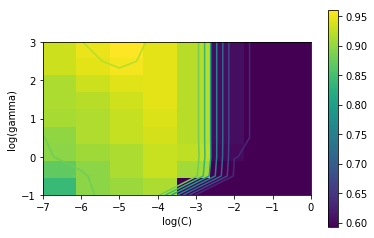

In [27]:
# Grid results for last fold
scores = clf.cv_results_['mean_test_score'].reshape(len(Cs), len(Gs))
extent = np.log10([Gs[0], Gs[-1], Cs[0], Cs[-1]])

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

im = plt.imshow(scores, extent=extent, origin='lower')
plt.colorbar(im)
plt.contour(np.log10(Gs), np.log10(Cs), scores)
plt.xlabel('log(C)')
plt.ylabel('log(gamma)')

### Exercise: Cross-validation on a random forest

You probably have realised by  now that the random forest classifier has a number of parameters that can be tweaked (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html ).

Use cross-validation now to find the best parameters, and report your cross-validation results and the results on the test set only.

In [ ]:
# Insert code here

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

# 1. use the train_test_split function to fix 20% of the full dataset as a test set.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.20, random_state=42)

clf4 = RandomForestClassifier()
clf4.fit(X_train,y_train)
# 2. define a number of parameters for your grid search (hint: you can use the function "range" to specify the parameters)
Estimators = np.arange(10,100,1)
Max_depth = np.arange(1,5,1)

clf4 = GridSearchCV(estimator=clf4, param_grid=dict(n_estimators = Estimators ,max_depth = Max_depth), n_jobs=-1)

# # 3. perform cross-validation on the train set
k_f = KFold(n_splits=10)
score_1 = cross_val_score(clf4, X_train, y_train, cv=k_f, n_jobs=-1)
print('Average accuracy: %.2f%%' % (np.mean(score_1)*100))

In [59]:
# 4. use the cross-validation results to choose the best parameters
# With my parameters, the best accuracy I got was 100% using 65 estimators and a max_depth of 6. So I'm going to train the random classifier now using those parameters and check the accuracy on the test set
est = clf4.best_estimator_.n_estimators
md = clf4.best_estimator_.max_depth
clf4 = RandomForestClassifier(n_estimators= est, max_depth = md)

# # 5. report the performance of the chosen model on the test set
# from sklearn.metrics import classification_report
# y_pred= clf4.predict(y_test)
# cr =classification_report(y_test,y_pred)
# print(cr)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

# Advanced topics

If you have had time to reach this part, well done!!

The two cells below cover two very important topics in ML: how to properly preprocess our data when we're using cross-validation (e.g., how to apply a standard scaler, in the example below) and how to compare two classifiers.

## Preprocessing on cross-validation

You noticed in the previous workbook, that the scandard scaler was fitted using the training set only. How do we do this in cross-validation? The answer is to use a Pipeline. We won't cover this here, but just for illustration purposes:

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), svm.SVC(C=1))
print("Cross validation accuracy: %.2f%%" % (np.mean(cross_val_score(clf, X_train, y_train, cv=10))*100))

# We now train on the full train set, 
# so the standard scaler is applied to the whole training set as in workbook 2:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
clf = svm.SVC(C=1)
clf.fit(X_train_sc, y_train)
print("Cross validation accuracy: %.2f%%" % (clf.score(X_test_sc, y_test)*100))

Cross validation accuracy: 97.12%
Cross validation accuracy: 98.25%


## Comparing two classifiers

Thanks to the cross-validation technique, we can also compare two classifiers in a more robust way. Use the cross-validation scores to compare the performance of a random forest and a SVC:

In [14]:
# Cross-validation scores for the SVM.SVC:
print("SVM")
clf1 = svm.SVC(C=1000.0, gamma=1e-05)
svm_xval1 = cross_val_score(clf1, X_train, y_train, cv=10)
print("Cross validation accuracy: %.2f%%" % (np.mean(svm_xval1)*100))

print("Random Forest")
clf2 = RandomForestClassifier(n_estimators=65, max_depth=6)
svm_xval2 = cross_val_score(clf2, X_train, y_train, cv=10)
print("Cross validation accuracy: %.2f%%" % (np.mean(svm_xval2)*100))

SVM
Cross validation accuracy: 95.58%
Random Forest
Cross validation accuracy: 96.26%


(0.9, 1.005)

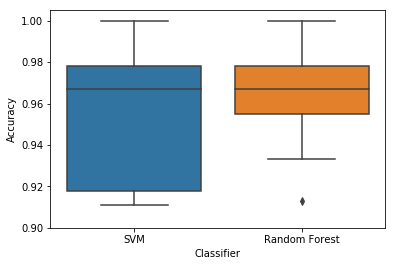

In [15]:
sns.boxplot(data=[svm_xval1, svm_xval2])
plt.xticks([0, 1], ["SVM", "Random Forest"])
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.ylim([0.9, 1.005])

Please note that the code above only plots the cross-validation scores. An even better way to compare the classifiers is to perform a statistical test of significance. This, however, remains as a topic for exploration for those of you who are curious.